<a href="https://colab.research.google.com/github/yachika-yashu/Machine-learning/blob/main/simple_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



In [3]:
df=pd.read_csv('placement.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


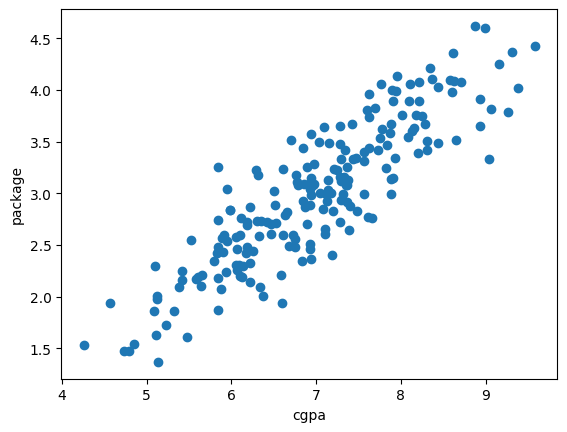

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

Here comes the best part: Machine learning

# **Step 1: Train-Test split**
1. Dividing inputs (capital X) Your features (independent variables) and outputs (y) Your target (dependent variable)
2. Split the whole dataset into training and testing data and putting the test size, test_size=0.2: 20% of the dataset goes into testing and 80% is used for training the model, random_state=2: This fixes the randomness of the split, so you get the same split every time you run the code. Useful for reproducibility when you're testing or sharing code.

In [6]:
#Libraries required for train test split and linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X=df.iloc[:,0:1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# **Step 2:Train Machine Learning Model**
1. Select the algorithm




2. *Fit* the algo to train

In [8]:

lr = LinearRegression()

#This creates a Linear Regression model — a type of supervised learning model used to predict continuous numerical values
#Linear regression finds the best-fitting straight line (or hyperplane in multiple dimensions) through the data.

In [9]:
lr.fit(X_train,y_train)

#.fit() is where the learning happens: it takes input features and target values
#The model learns the best coefficients (m) and intercept (b) for the equation:
#so predicted values  ŷ = m1 * x1 +m2x2+m3x3+....+ b
#So the model tries to minimize the difference between:
#The actual values (y_train)
#And the predicted values (ŷ = lr.predict(X_train))

LinearRegression()

In [10]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Plotting the line

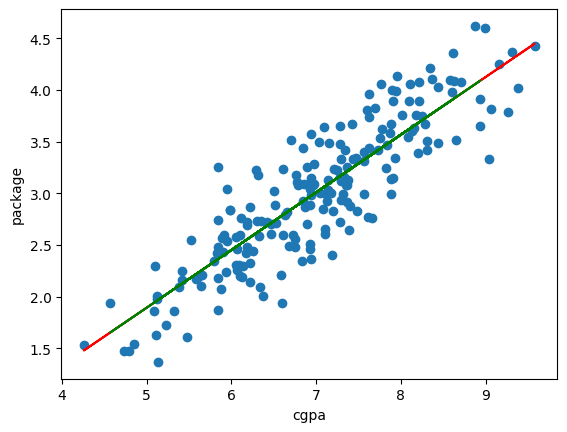

In [11]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train), color='red')
plt.plot(X_test,lr.predict(X_test), color='green')
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

lr is object so it will have some attributes

In [13]:
m=lr.coef_ #slope
b=lr.intercept_ #y intercept

Calculating Regression metrics


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_pred=lr.predict(X_test)
print(y_pred)
print(y_test)


[3.89111601 3.09324469 2.38464568 2.57434935 1.6537286  1.77647803
 2.07219258 2.93143862 3.76278706 2.93701814 4.09197872 3.51170867
 2.97049525 2.40138424 3.18809652 3.46707251 1.94386362 3.24389172
 2.97607477 3.41685683 2.55761079 3.16577844 2.85890486 3.12114229
 3.68467378 2.8700639  3.49497011 3.34432308 3.91901361 1.96060218
 3.65119666 3.2104146  3.74046898 2.7863711  2.78079158 3.27178932
 3.52844723 2.61340599 2.65804215 2.71383735]
112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64


In [22]:
MAE=mean_absolute_error(y_test,y_pred)
print(MAE)
MSE=mean_squared_error(y_test,y_pred)
print(MSE)
R2_Score=r2_score(y_test,y_pred)
print(R2_Score)
#Adjusted R2
ar2=1-(1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R2 Score:',ar2)

0.2884710931878175
0.12129235313495527
0.780730147510384


In [18]:
#Adjusted R2
ar2=1-(1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R2 Score:',ar2)

Adjusted R2 Score: 0.7749598882343415


1. R² Score (0.7807)
This is a good R² value. It means:
the model explains 78.07% of the variance in the target variable (y_test) using the predictors (X_test).
That’s a strong indication of a well-fitting regression model.

2. MAE (0.2885)
This is the average absolute difference between your predicted and actual values.
Lower is better.
Your model’s predictions are, on average, ~0.29 units off from the actual values.

3. MSE (0.1213)
This penalizes larger errors more heavily (since it's squared).
Still low → indicates that your errors aren’t just frequent but also not large in magnitude.
MAE and MSE both being low = consistent and fairly accurate model.

4. Adjusted R² Score: 0.775
The Adjusted R² score slightly dropped from 0.7807 to 0.775.

This indicates that, after adjusting for the number of predictors in your model, your model still explains 77.5% of the variance in the target variable.

The drop from the unadjusted R² (0.7807) to adjusted R² (0.775) suggests that the additional features you are using may not be improving the model much or may have some impact in slightly increasing complexity.